In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Load the data
hr_data = pd.read_csv("G:\learnby data\capstoneproj\HR_Employee_Attrition_Data.csv")
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr_data.shape

(2940, 35)

In [5]:
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [20]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [6]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# checking for unique elements to drop the columns

In [ ]:
# checking for unique elements to drop the columns

for column in hr_data.columns:
    print(f"{column}: Number of unique values {hr_data[column].nunique()}")
    print("-----------------------")

In [8]:
import warnings
warnings.filterwarnings("ignore")
hr_data.drop(["EmployeeNumber","Over18","EmployeeCount","StandardHours"],axis=1,inplace=True)

In [9]:
hr_data.shape

(2940, 31)

# spliting of numerical and Categorical Data

In [ ]:
# spliting of numerical and Categorical Data

numerical_data= hr_data.select_dtypes(include=["int64"])
numerical_data.shape

In [11]:
categorical_data= hr_data.select_dtypes(include=["O"])
categorical_data.shape

(2940, 8)

In [12]:
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Dealing with Categorical Features

In [ ]:
# Dealing with Categorical Features 

object_col = []
for column in hr_data.columns:
    if hr_data[column].dtype == object:
        if len(hr_data[column].unique()) <= 30:
            object_col.append(column)
            print(f"{column} : {hr_data[column].unique()}")
            print(hr_data[column].value_counts())
            print("--------------------------")
object_col.remove('Attrition')

In [14]:
len(object_col)

7

In [15]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
hr_data["Attrition"] = label.fit_transform(hr_data.Attrition)

# Dealing with Numerical Data

In [16]:
#Numerical Features
disc_col = []
for column in hr_data.columns:
    if hr_data[column].dtypes != object:
        if hr_data[column].nunique() < 30:
            print(f"{column} : {hr_data[column].unique()}")
            disc_col.append(column)
            print("--------------------------")
disc_col.remove('Attrition')

Attrition : [1 0]
--------------------------
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
--------------------------
Education : [2 1 4 3 5]
--------------------------
EnvironmentSatisfaction : [2 3 4 1]
--------------------------
JobInvolvement : [3 2 4 1]
--------------------------
JobLevel : [2 1 3 4 5]
--------------------------
JobSatisfaction : [4 2 3 1]
--------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
--------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
--------------------------
PerformanceRating : [3 4]
--------------------------
RelationshipSatisfaction : [1 4 2 3]
--------------------------
StockOptionLevel : [0 1 3 2]
--------------------------
TrainingTimesLastYear : [0 3 2 5 1 4 6]
--------------------------
WorkLifeBalance : [1 3 2 4]
--------------------------
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
-------

# Checking Data with plots

0    2466
1     474
Name: Attrition, dtype: int64


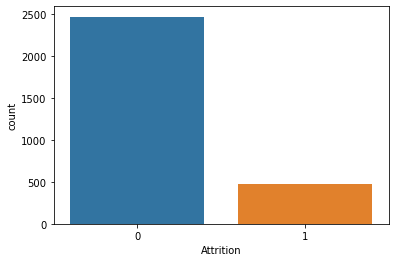

In [17]:
# Break down of attrition

sns.countplot(hr_data["Attrition"])
print(hr_data['Attrition'].value_counts())

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


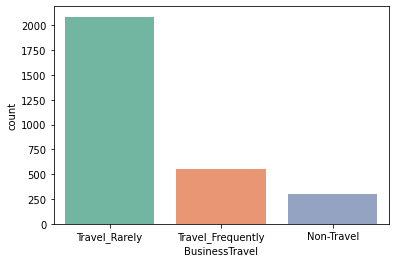

In [20]:
# Most of the Employees prefer less Traveling.

sns.countplot(hr_data["BusinessTravel"],palette="Set2")
print(hr_data['BusinessTravel'].value_counts())

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


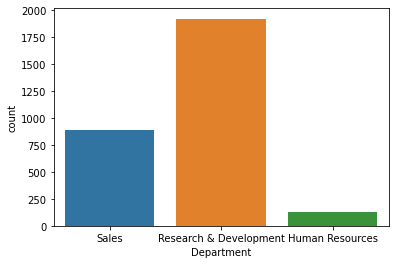

In [21]:
# HR department travel less when compared to other departments

sns.countplot(hr_data["Department"])
print(hr_data['BusinessTravel'].value_counts())

Male      1764
Female    1176
Name: Gender, dtype: int64


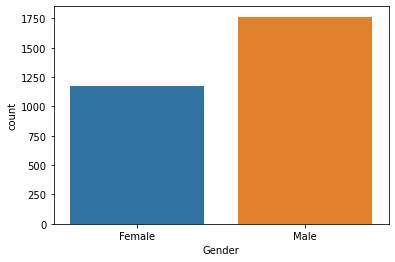

In [22]:
#There are more number of Male employees.

sns.countplot(hr_data["Gender"])
print(hr_data['Gender'].value_counts())

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64


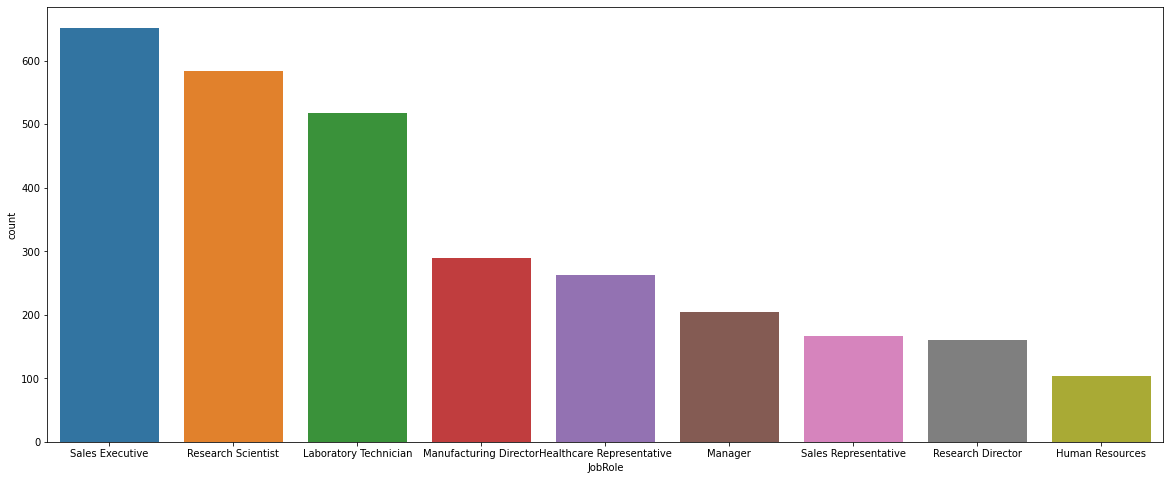

In [23]:
# There are more employee who works as a Sales Executive when compared to hr department.

plt.figure(figsize=(20,8))
sns.countplot(hr_data["JobRole"])
print(hr_data['JobRole'].value_counts())

Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64


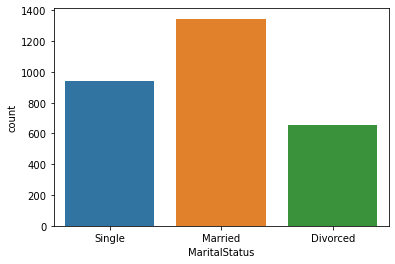

In [25]:
# Most of the employees who are working are Married.

sns.countplot(hr_data["MaritalStatus"])
print(hr_data['MaritalStatus'].value_counts())

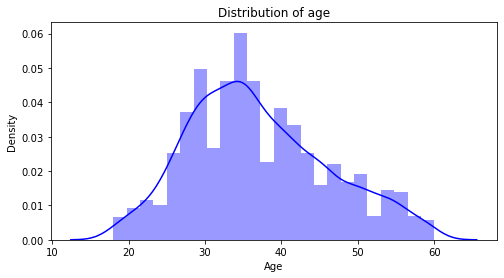

In [26]:
# The average Age of working employees is 35.

plt.figure(figsize=(8,4))
plt.title("Distribution of age")
a = sns.distplot(hr_data["Age"], color = 'blue')

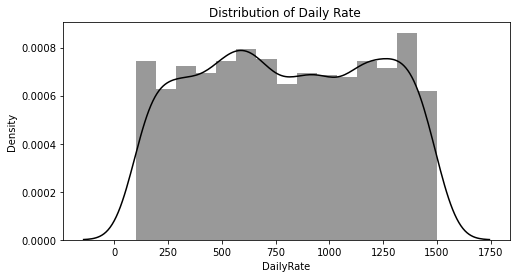

In [27]:
# The average DailyRate is ~750.

plt.figure(figsize=(8,4))
plt.title("Distribution of Daily Rate ")
b= sns.distplot(hr_data["DailyRate"], color = 'black')

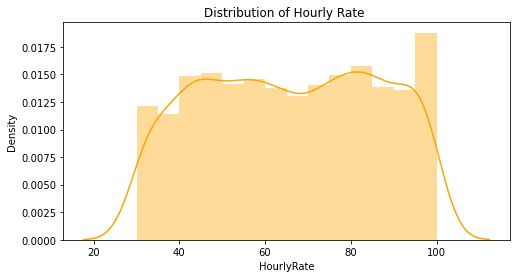

In [28]:
# The Hourly Rate of employees are ~ 70.

plt.figure(figsize=(8,4))
plt.title("Distribution of Hourly Rate ")
c= sns.distplot(hr_data["HourlyRate"], color = 'orange')

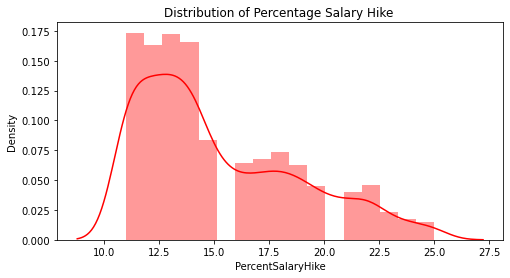

In [29]:
# The average percentage salary hike of employees are 12.5

plt.figure(figsize=(8,4))
plt.title("Distribution of Percentage Salary Hike ")
d= sns.distplot(hr_data["PercentSalaryHike"], color = 'red')

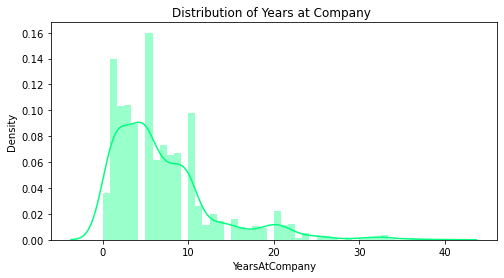

In [30]:
# The average years of employees at company is 5 years.

plt.figure(figsize=(8,4))
plt.title("Distribution of Years at Company ")
e= sns.distplot(hr_data["YearsAtCompany"], color = 'springgreen')

# BiVariate Analysis

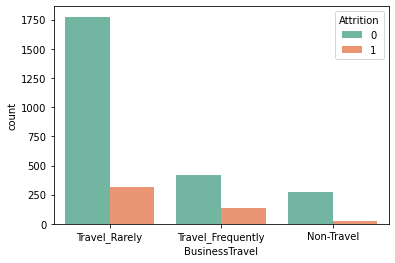

In [31]:
# From this Visualization, it is clear that employees who travel rarely have high attrition.

sns.countplot(x="BusinessTravel", hue="Attrition",data=hr_data,palette="Set2")
plt.show()

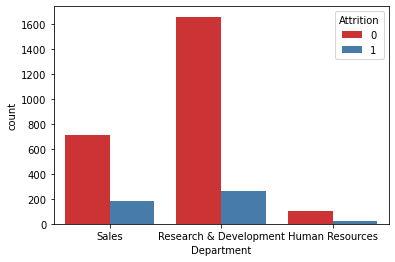

In [32]:
# From this visualization, it is clear that employees who are in Research & Development have high attrition.

sns.countplot(x="Department", hue="Attrition",data=hr_data,palette="Set1")
plt.show()

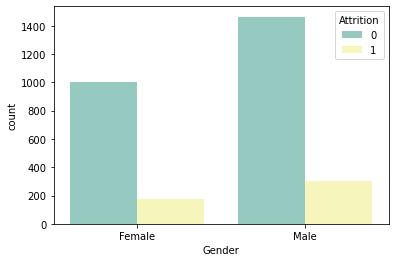

In [33]:
# From this visualization, Males have high attrition.

sns.countplot(x="Gender", hue="Attrition",data=hr_data,palette="Set3")
plt.show()

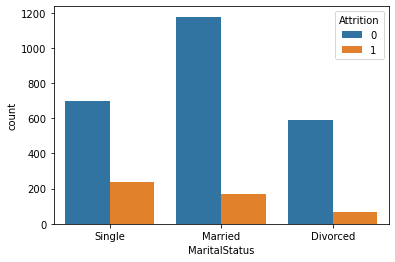

In [34]:
# Employees who are single have high attrition.

sns.countplot(x="MaritalStatus", hue="Attrition",data=hr_data)
plt.show()

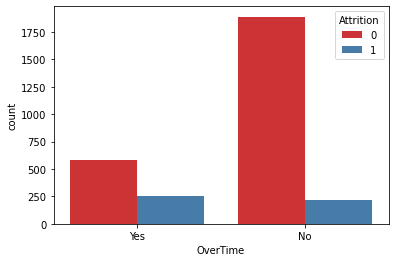

In [35]:
# Employees who do over time have high attrition.

sns.countplot(x="OverTime", hue="Attrition",data=hr_data,palette="Set1")
plt.show()

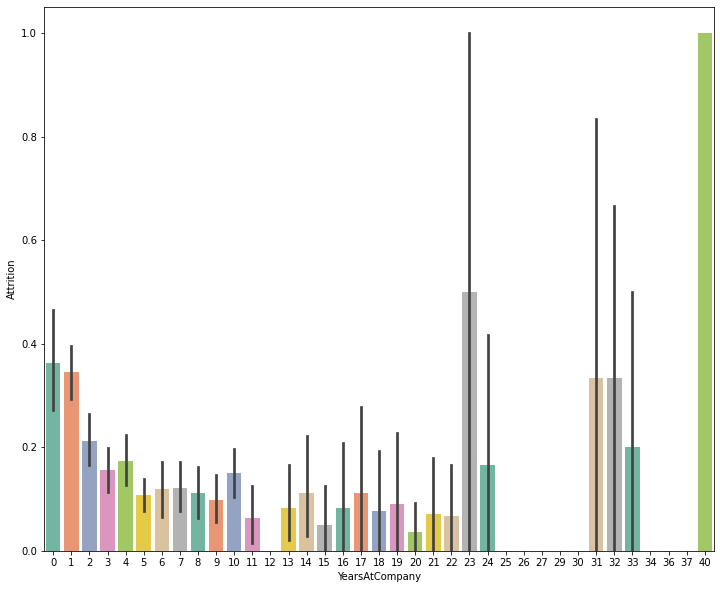

In [36]:
# Employees who are at the company and have experience <=5 have high attrition.

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="YearsAtCompany", y="Attrition",data=hr_data,palette="Set2")
plt.show()

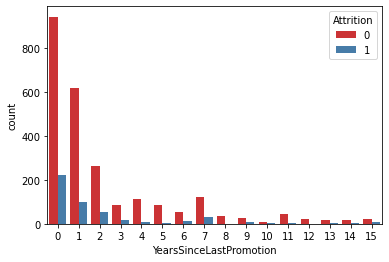

In [37]:
# Employees who have less experience since last promotion have high attrition.

sns.countplot(x="YearsSinceLastPromotion", hue="Attrition",data=hr_data,palette="Set1")
plt.show()

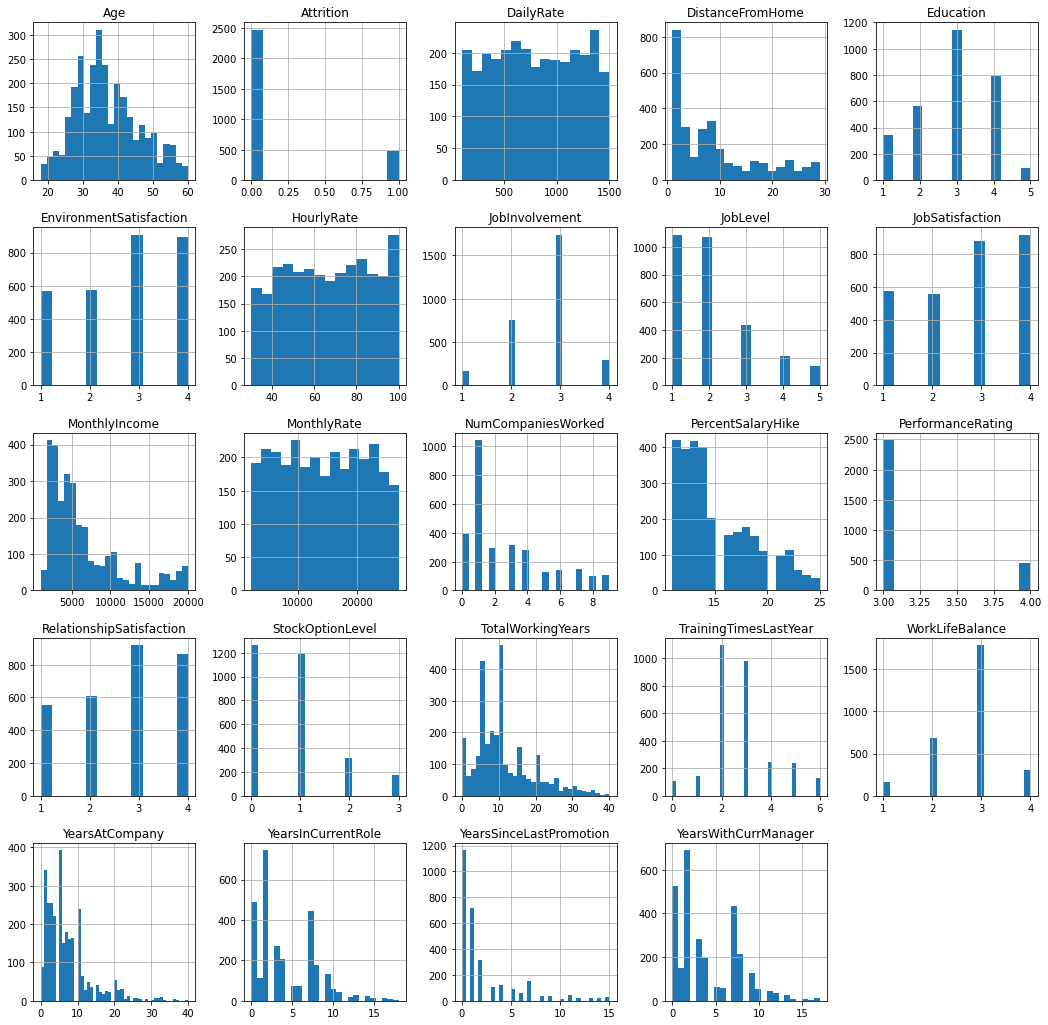

In [38]:
# Multi-Variate Analysis
hr_data.hist(figsize=(18,18),grid=True,bins='auto');

# Checking for correlation

In [39]:
hr_data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<AxesSubplot:>

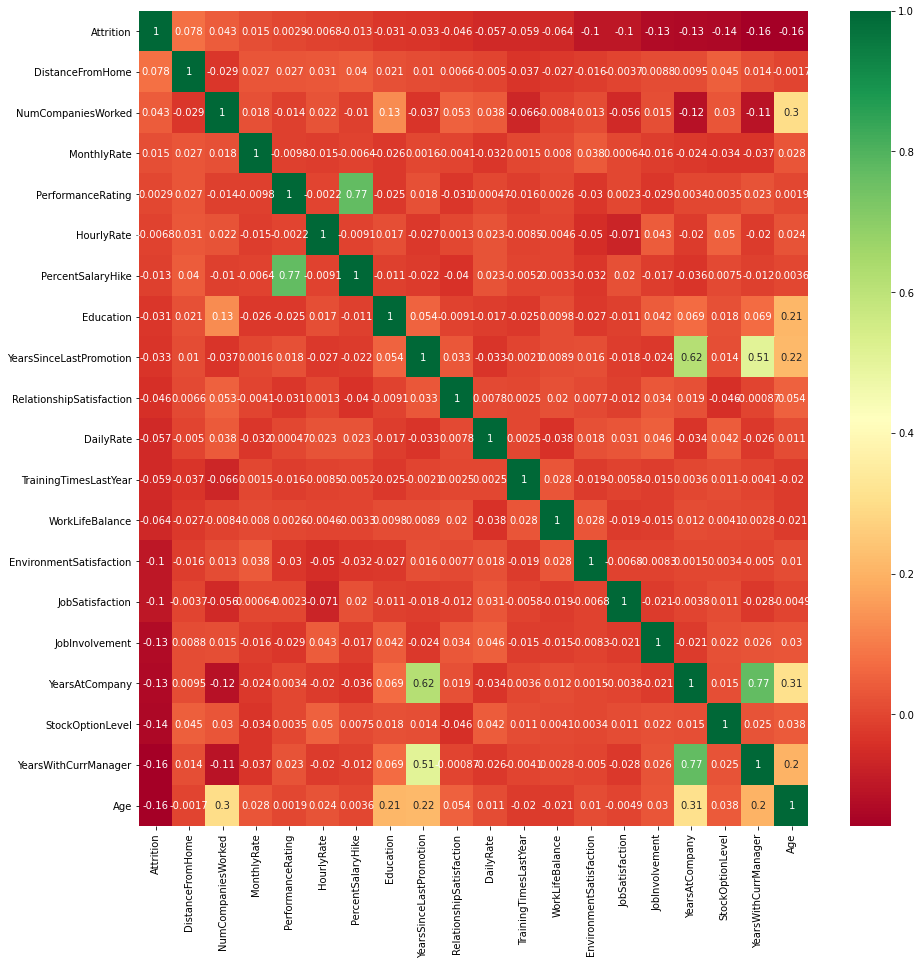

In [40]:
col = hr_data.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(hr_data[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

# Checking fro Skewness

In [41]:
# Checking Skewness
hr_data.skew(axis=0)

Age                         0.413075
Attrition                   1.843424
DailyRate                  -0.003517
DistanceFromHome            0.957629
Education                  -0.289533
EnvironmentSatisfaction    -0.321490
HourlyRate                 -0.032294
JobInvolvement             -0.498165
JobLevel                    1.024878
JobSatisfaction            -0.329504
MonthlyIncome               1.369117
MonthlyRate                 0.018568
NumCompaniesWorked          1.025947
PercentSalaryHike           0.820709
PerformanceRating           1.920901
RelationshipSatisfaction   -0.302673
StockOptionLevel            0.968485
TotalWorkingYears           1.116601
TrainingTimesLastYear       0.552842
WorkLifeBalance            -0.552198
YearsAtCompany              1.763628
YearsInCurrentRole          0.916895
YearsSinceLastPromotion     1.983277
YearsWithCurrManager        0.833025
dtype: float64

# Converting data

In [42]:
# Label Encoder
# Lets convert the target variable
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
hr_data["Attrition"]=LE.fit_transform(hr_data["Attrition"])
hr_data["BusinessTravel"]=LE.fit_transform(hr_data["BusinessTravel"])
hr_data["Department"]=LE.fit_transform(hr_data["Department"])
hr_data["EducationField"]=LE.fit_transform(hr_data["EducationField"])
hr_data["Gender"]=LE.fit_transform(hr_data["Gender"])
hr_data["JobRole"]=LE.fit_transform(hr_data["JobRole"])
hr_data["MaritalStatus"]=LE.fit_transform(hr_data["MaritalStatus"])
hr_data["OverTime"]=LE.fit_transform(hr_data["OverTime"])

# checking for outliers 

In [43]:
# Checking Outliers
from scipy.stats import zscore
z_score=abs(zscore(hr_data))
print("The shape of dataset before removing outliers",hr_data.shape)
hr_data=hr_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",hr_data.shape)

The shape of dataset before removing outliers (2940, 31)
The shape of dataset after removing outliers (2774, 31)


# checking for Zero Varience 

In [44]:
from sklearn.feature_selection import VarianceThreshold
varselector=VarianceThreshold(threshold=0)
varselector.fit(hr_data)
print("Earlier shape of data: ",hr_data.shape)
print("shape after transformation: ",varselector.transform(hr_data).shape)

Earlier shape of data:  (2774, 31)
shape after transformation:  (2774, 31)


# Spliting data for Model

In [45]:
# Dividing the input and output variables
X= hr_data.drop(["Attrition"],axis=1)
y= hr_data["Attrition"]

In [46]:
from sklearn.model_selection import train_test_split  

In [168]:
# Splitting into training and testing
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20,random_state=42,stratify=y)


In [169]:
y_test.value_counts()[0] / y_test.shape[0]

0.8342342342342343

In [170]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("------------TRAINIG RESULTS: \n----------")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("---------TESTING RESULTS: \n------------")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# logistic Regression Model

In [172]:
 # Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

------------TRAINIG RESULTS: 
----------
CONFUSION MATRIX:
[[1797   56]
 [ 227  139]]
ACCURACY SCORE:
0.8725
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.887846    0.712821  0.872465     0.800333      0.858977
recall        0.969779    0.379781  0.872465     0.674780      0.872465
f1-score      0.927005    0.495544  0.872465     0.711275      0.855840
support    1853.000000  366.000000  0.872465  2219.000000   2219.000000
---------TESTING RESULTS: 
------------
CONFUSION MATRIX:
[[451  12]
 [ 55  37]]
ACCURACY SCORE:
0.8793
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891304   0.755102  0.879279    0.823203      0.868727
recall       0.974082   0.402174  0.879279    0.688128      0.879279
f1-score     0.930857   0.524823  0.879279    0.727840      0.863550
support    463.000000  92.000000  0.879279  555.000000    555.000000


# KNN classifier model

In [173]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

In [174]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind)))) 

Max test score 96.75675675675676 and k = [1]


In [175]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
m2=knn.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((m2),3))
              

The accuracy of the KNN Model is: 0.825


In [176]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,423,40,463
1,57,35,92
All,480,75,555


In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       463
           1       0.47      0.38      0.42        92

    accuracy                           0.83       555
   macro avg       0.67      0.65      0.66       555
weighted avg       0.81      0.83      0.82       555



In [178]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [202]:
a_c2=roc_auc_score(y_test, y_pred_proba)
a_c2

0.8937224152502583

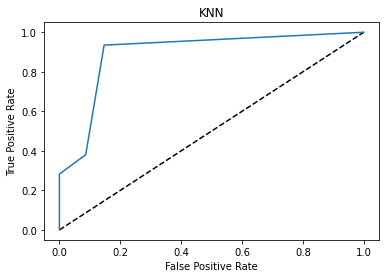

In [181]:
# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN")
plt.show()

In [182]:
# We will use auc_roc score as the metrics because target variable has imbalance dataset
def max_auc_roc_sc(w,X,y):
    max_auc_roc_sc=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        w.fit(X_train,y_train)
        y_pred= w.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>max_auc_roc_sc:
            max_auc_roc_sc=auc_roc
            a_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",a_score," and it is :",round((max_auc_roc_sc),3))

# Decision Tree Classifier

In [183]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth=50)

max_auc_roc_sc(dtc,X,y)

Maximum AUC_ROC Score corresponding to: 84  and it is : 0.919


In [184]:
pred_dtc= dtc.predict(X_test)
dtc1= dtc.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((dtc1),3))
print(confusion_matrix(y_test,pred_dtc))

The accuracy of the Decision Tree Model is: 0.184
[[ 11 452]
 [  1  91]]


In [185]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.92      0.02      0.05       463
           1       0.17      0.99      0.29        92

    accuracy                           0.18       555
   macro avg       0.54      0.51      0.17       555
weighted avg       0.79      0.18      0.09       555



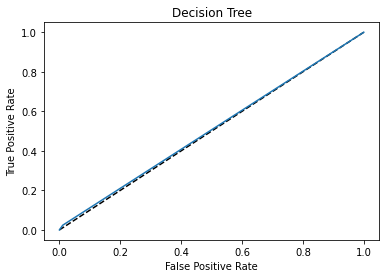

In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= dtc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

In [208]:
a_c3=roc_auc_score(y_test, dtc.predict(X_test))
a_c3

0.5064442670673303

# Random Forest Classifier

In [188]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
parameters= {'n_estimators':[4,6,8],'max_features':['log2','sqrt','auto'],'criterion':['entropy','gini'],'max_depth':[2,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[3,5,7]}
rfc= GridSearchCV(rfc,parameters)
rfc.fit(X,y)
rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 6}

In [194]:
rfc=RandomForestClassifier(criterion='gini', max_depth=10,max_features='auto',min_samples_leaf=3,min_samples_split=2,n_estimators=6)
max_auc_roc_sc(rfc,X,y)

Maximum AUC_ROC Score corresponding to: 96  and it is : 0.766


In [195]:
pred_rfc= rfc.predict(X_test)
rf= rfc.score(X_test, y_test)
print("The accuracy of the Random Forest Classifier is:",round((rf),3))

The accuracy of the Random Forest Classifier is: 0.782


In [196]:
print(confusion_matrix(y_test,pred_rfc))

[[414  49]
 [ 72  20]]


In [197]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       463
           1       0.29      0.22      0.25        92

    accuracy                           0.78       555
   macro avg       0.57      0.56      0.56       555
weighted avg       0.76      0.78      0.77       555



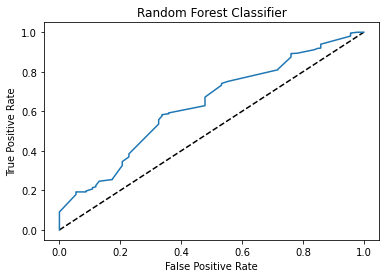

In [198]:
y_pred_prob= rfc.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)

# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [205]:
a_c4=roc_auc_score(y_test, rfc.predict(X_test))
a_c4

0.5557798854352523

# Evaluation of the models and predicted observation

In [209]:
# Evaluation:
#Lets initialise the data frame with columns model and f1_score
data= [["KNN", m2,a_c2 ],["Decision Tree Classifier",dtc1,a_c3],["Random Forest Classifier",rf,a_c4]]
comparsion_table= pd.DataFrame(data, columns=["Model Name", "Accuracy","AUC Score"], index=[1,2,3,])
comparsion_table

,Model Name,Accuracy,AUC Score
1,KNN,0.825225,0.893722
2,Decision Tree Classifier,0.183784,0.506444
3,Random Forest Classifier,0.781982,0.555780


In [ ]:
# Observations:

# From the above data, both KNN and Random Forest Classifier performed well with 82.5%  and 78.1% accuracy.
# As the data was imbalanced, we used AUC ROC for model evaluation 